In [107]:
!pip install Pydrive

In [108]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [109]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [110]:
id="1vzTd4A7dajkypplD1boSWDrzKwmpne4h"

In [111]:
imported = drive.CreateFile({'id':id})
imported.GetContentFile('Fake.csv')

In [112]:
id="1vzTd4A7dajkypplD1boSWDrzKwmpne4h"

In [113]:
imported = drive.CreateFile({'id':id})
imported.GetContentFile('True.csv')

In [114]:
import pandas as pd

In [115]:
df_true_news = pd.read_csv("True.csv")

In [116]:
df_fake_news = pd.read_csv("Fake.csv")

In [117]:
df_true_news.head(20)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [118]:
df_fake_news.head(20)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [119]:
df_fake_news.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [120]:
df_true_news.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [121]:
#Find Missing Data if any at all
def find_missing_values(data):
  total=len(data)
  for col in data.columns:
    if (data[col].isna().sum()!=0):
      print("{} has: (:,} ({:.2}%) missing values.".format(col,data[col].isna().sum,(data[col].isna().sum()/total)*100)) 
    
    else:
      print("{} has no any missing values".format(col))
  print("\nMissing Value Summary\n{}".format("-"*35))
  print("\ndf_db\n{}".format("-"*15))
  print(data.isnull().sum(axis=0))

In [122]:
def remove_duplicates(data):
  print("\nCleaning Summary\n{}".format("-"*35))
  size_before=len(data)
  data.drop_duplicates(subset=None , keep="first", inplace=True)
  size_after=len(data)
  print("... removed {} duplicate rows in db data".format(size_before-size_after))

In [123]:
find_missing_values(df_true_news)

title has no any missing values
text has no any missing values
subject has no any missing values
date has no any missing values

Missing Value Summary
-----------------------------------

df_db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [124]:
find_missing_values(df_fake_news)

title has no any missing values
text has no any missing values
subject has no any missing values
date has no any missing values

Missing Value Summary
-----------------------------------

df_db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [125]:
remove_duplicates(df_true_news)


Cleaning Summary
-----------------------------------
... removed 206 duplicate rows in db data


In [126]:
remove_duplicates(df_fake_news)


Cleaning Summary
-----------------------------------
... removed 206 duplicate rows in db data


In [127]:
df_merged=pd.merge(df_fake_news,df_true_news,how='outer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


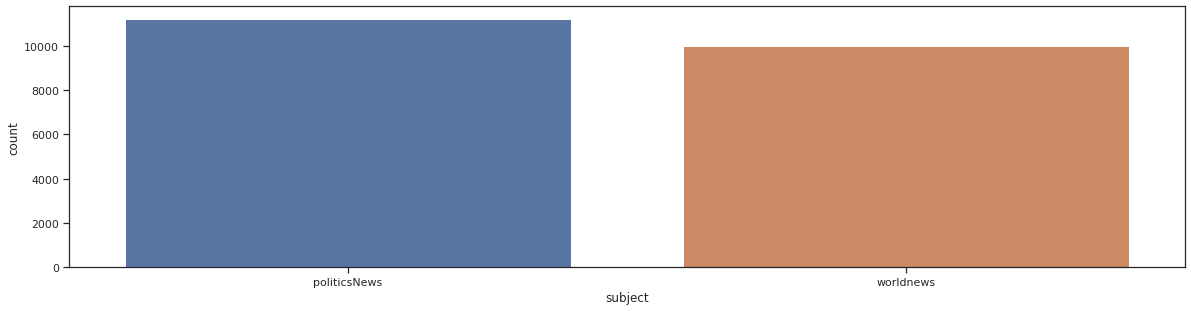

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

fig_dims=(20,4.8)
fig, ax=plt.subplots(figsize=fig_dims)
sns.countplot(df_merged['subject'], ax=ax, data=df_merged);

In [129]:
df_fake_news['label']=0
df_true_news['label']=1

In [130]:
df_train=pd.merge(df_fake_news, df_true_news, how='outer')

In [131]:
!pip install sklearn

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

**Remove stopwords and punctuations**

In [133]:
import string 
from nltk.corpus import stopwords

In [134]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
def text_process(text):
  no_punctuation=[char for char in text if char not in string.punctuation]
  no_punctuation=''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

**Model Creation and Training**

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(df_train['title'], df_train['label'], test_size=0.2, random_state=42)

In [138]:
#Deep learning Multi-perceptron neural network binary classifier

from sklearn.neural_network import MLPClassifier


In [139]:
from sklearn.pipeline import Pipeline

news_classifier = Pipeline([
                            ('vectorizer', CountVectorizer(analyzer=text_process)), 
                            ('tfidf', TfidfTransformer()), 
                            ('classifier', MLPClassifier(solver='adam', activation='tanh', random_state=1,
                                                         max_iter=200, early_stopping= True))
])

In [140]:
news_classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x7f0c2aaa0050>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_ite

**Model Evaluation**

In [141]:
predicted= news_classifier.predict(X_test)

In [142]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.06      0.31      0.09       761
           1       0.88      0.48      0.62      7724

    accuracy                           0.46      8485
   macro avg       0.47      0.39      0.36      8485
weighted avg       0.80      0.46      0.57      8485



**Saving and downloading your model**

In [144]:
from sklearn.externals import joblib

In [145]:
joblib.dump(news_classifier, 'model.pkl')

['model.pkl']

In [146]:
from googleapiclient.discovery import build
drive_service= build('drive', 'v3')

In [147]:
from googleapiclient.http import MediaFileUpload

file_metadata= {
    'name' : 'model.pkl',
    'mimeType' : 'text/plain'
}
media= MediaFileUpload('model.pkl',
                       mimetype= 'text/plain',
                       resumable= True)
created= drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1GKUMo2n8P4kuq334AhivZXZSn5B6HHCe


**Model Deployment**

In [148]:
news_title= ['Man has now landed on Mars']
prediction= news_classifier.predict(news_title)
print(prediction)

[0]


In [149]:
news_title1=['Trump wants Postal Service to charge']
prediction1= news_classifier.predict(news_title1)
print(prediction1) 

[1]
